### Import all the required Libraries

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

C:\Users\adavi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the Dataset and Pre-processing the Data

In [2]:
# loading the dataset
df = pd.read_csv("Diabetes_Dataset.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
# identifying the shape of the data
df.shape

(70692, 22)

In [4]:
# determing the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [5]:
# checking for any null values
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
for col in df.columns:
    if col != 'BMI':
        df[col] = df[col].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  int32  
 1   HighBP                70692 non-null  int32  
 2   HighChol              70692 non-null  int32  
 3   CholCheck             70692 non-null  int32  
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  int32  
 6   Stroke                70692 non-null  int32  
 7   HeartDiseaseorAttack  70692 non-null  int32  
 8   PhysActivity          70692 non-null  int32  
 9   Fruits                70692 non-null  int32  
 10  Veggies               70692 non-null  int32  
 11  HvyAlcoholConsump     70692 non-null  int32  
 12  AnyHealthcare         70692 non-null  int32  
 13  NoDocbcCost           70692 non-null  int32  
 14  GenHlth               70692 non-null  int32  
 15  MentHlth           

In [8]:
# analyzing the statistics of the data
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Exploratory Data Analysis (EDA)

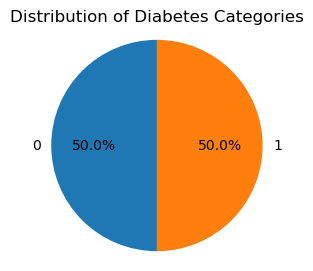

In [9]:
# plotting each category of diabetes
diabetes_counts = df['Diabetes_binary'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Categories')
plt.axis('equal')
plt.show()

#### Interpretation:
The graph suggests that the dataset contains a balanced distribution of positive and negative cases of diabetes. This balance ensures a fair analysis for predicting the likelihood of diabetes in individuals.

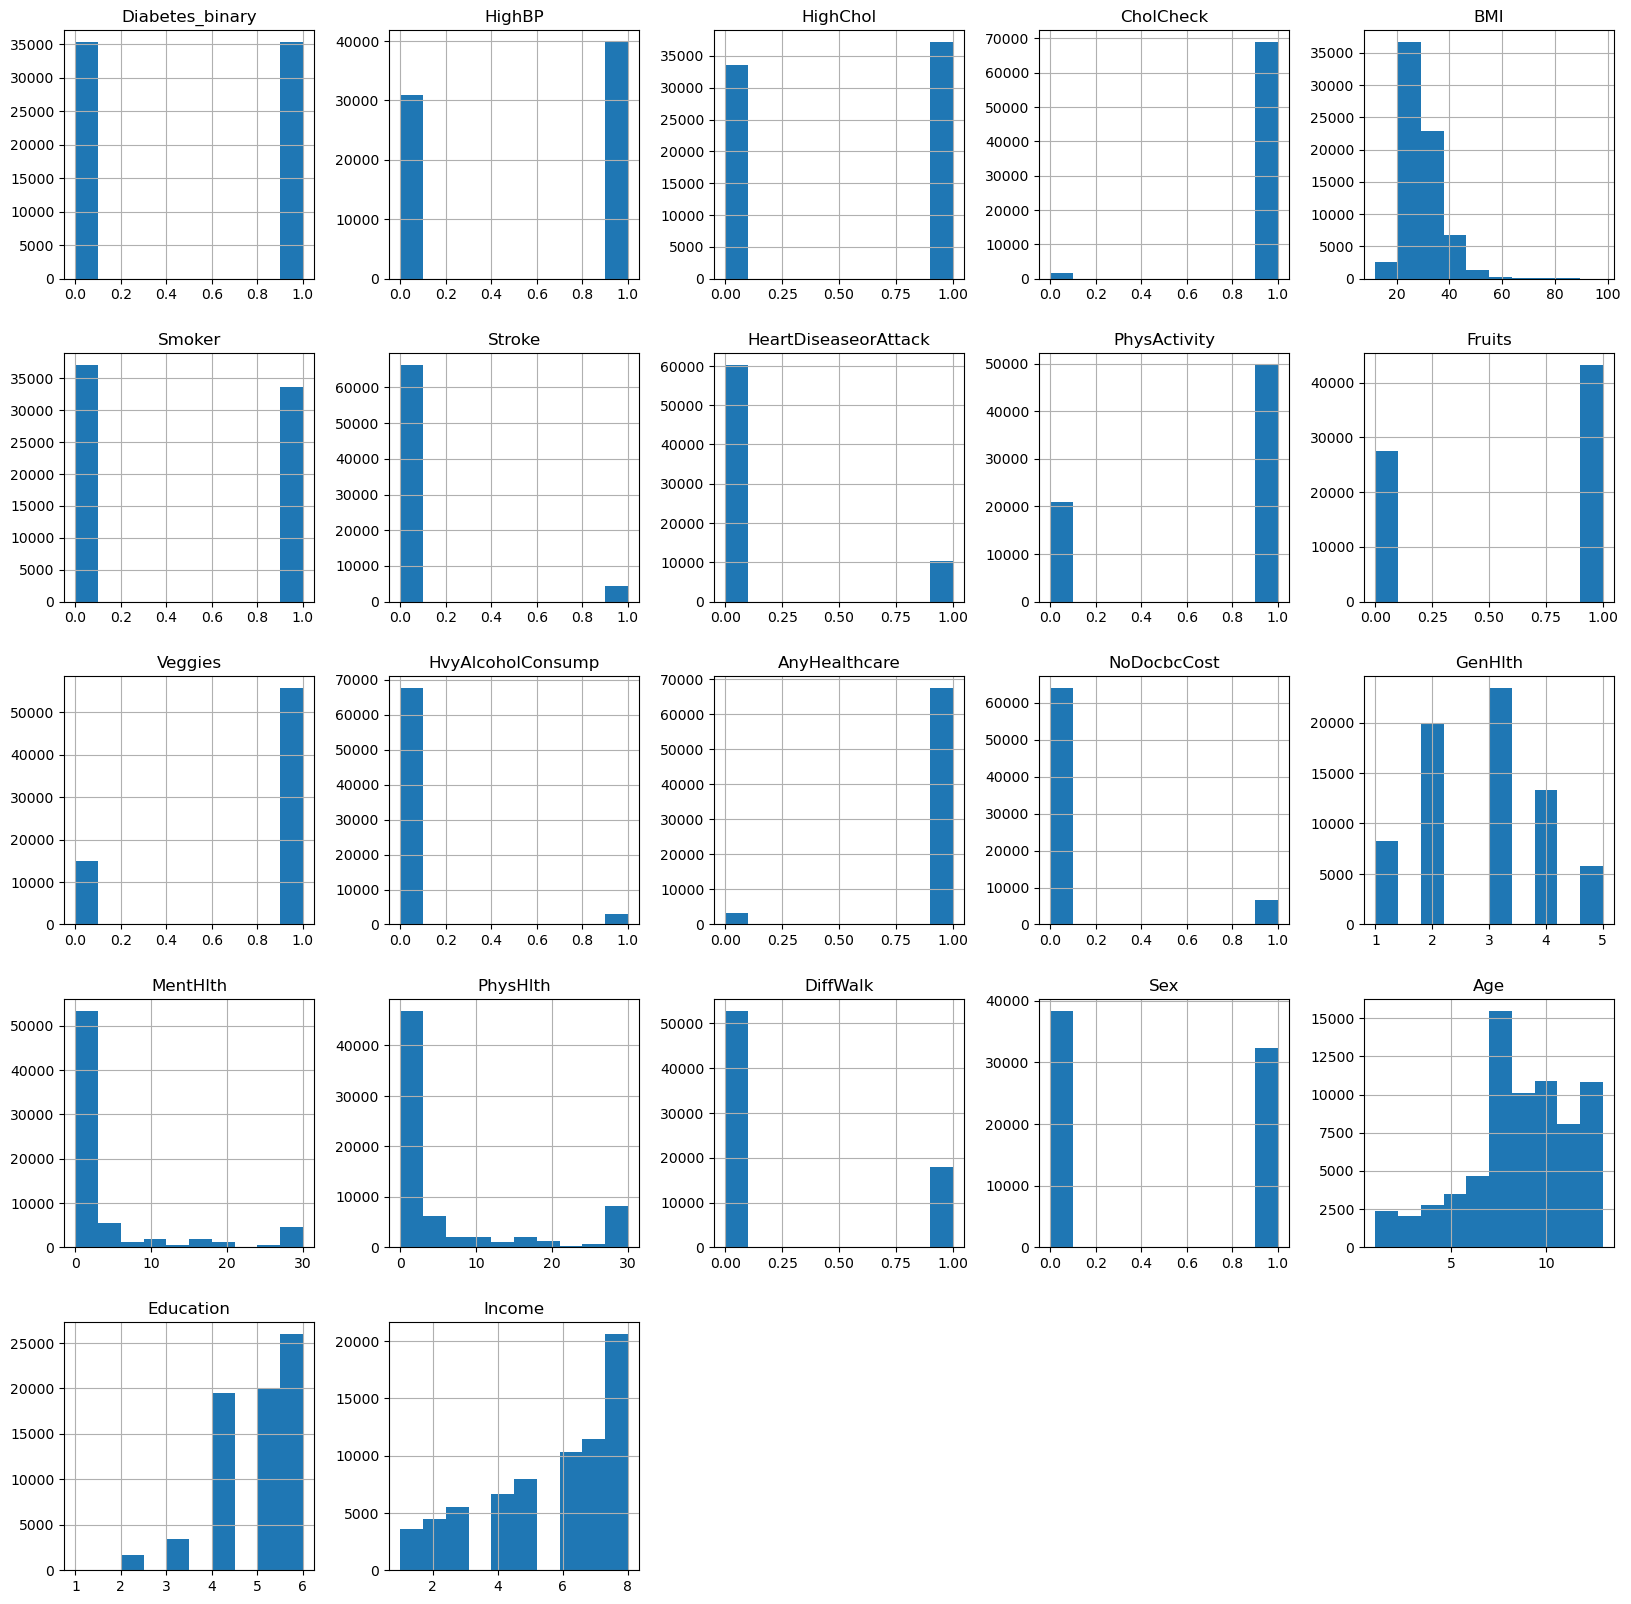

In [10]:
# plotting histogram of all the features
df.hist(figsize=(20, 20))
plt.show()

#### Interpretation:
The histograms visualize the distribution of each feature in the dataset, providing insights into central tendency, spread, and skewness of values. This aids in identifying patterns, outliers, and understanding the data's overall structure.

In [11]:
# determining the dataframe of the diabetes positive
df_positive = df[df['Diabetes_binary'] == 1]

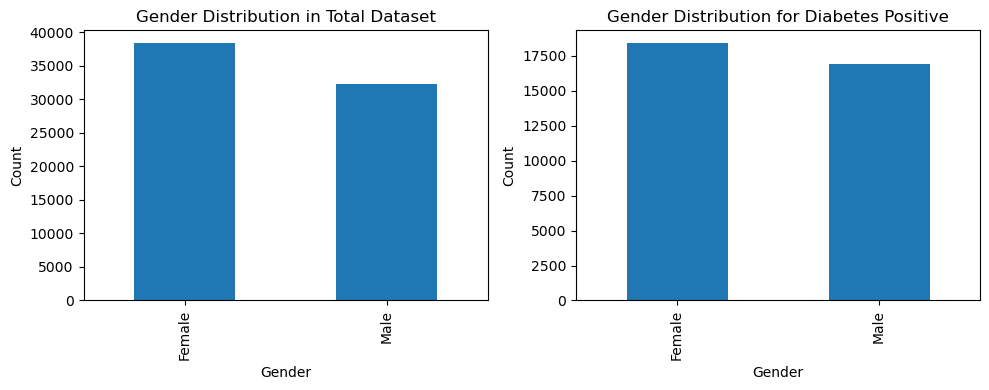

In [12]:
# Total dataset - Gender distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Sex'].map({0: 'Female', 1: 'Male'}).value_counts().plot(kind='bar')
plt.title('Gender Distribution in Total Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

# Diabetes positive dataset - Gender distribution
plt.subplot(1, 2, 2)
df_positive['Sex'].map({0: 'Female', 1: 'Male'}).value_counts().plot(kind='bar')
plt.title('Gender Distribution for Diabetes Positive')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Interpretation:
The bar chart illustrates the count of individuals diagnosed with diabetes across genders, providing insights into whether gender influences diabetes prevalence. The visualization suggests a slightly higher proportion of women diagnosed with diabetes compared to men, which could be attributed to the slightly higher number of females in the total dataset.

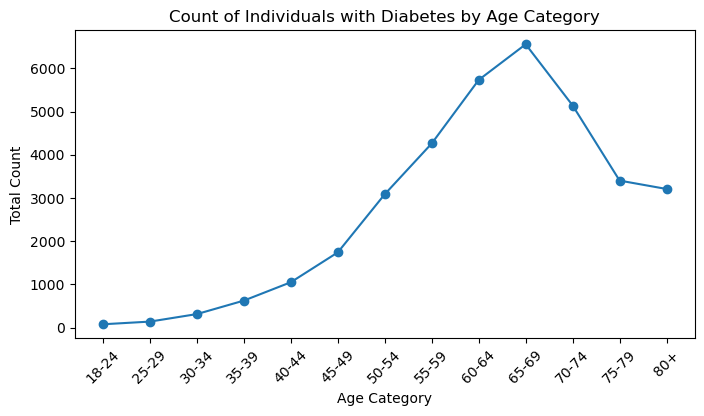

In [13]:
# plotting diabetes_positive based on age
age_counts = df_positive['Age'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.title('Count of Individuals with Diabetes by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Count')
plt.xticks(age_counts.index, ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], rotation=45)
plt.show()

#### Interpretation:
The line plot illustrates the count of individuals diagnosed with diabetes across different age categories. It is observed that the number of diabetes-positive cases begins to increase notably from the age group of 40-44 years, with a peak in the age range of 60-70 years. This suggests that the likelihood of diabetes tends to rise with advancing age, peaking in the later years of adulthood.

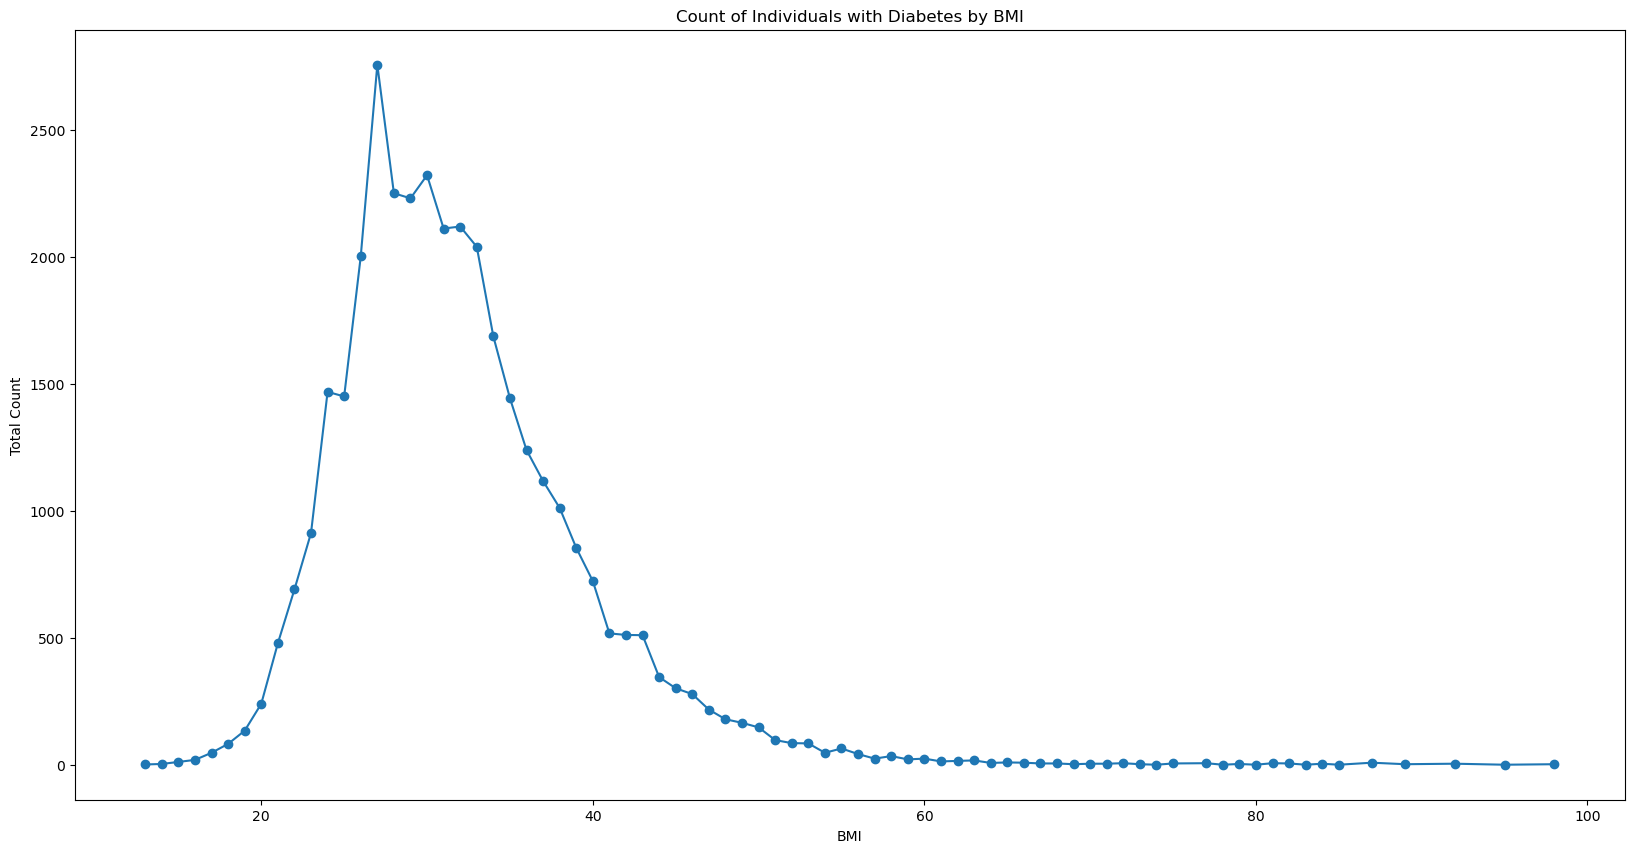

In [14]:
# plotting diabetes_positive based on BMI
bmi_counts = df_positive['BMI'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.plot(bmi_counts.index, bmi_counts.values, marker='o', linestyle='-')
plt.title('Count of Individuals with Diabetes by BMI')
plt.xlabel('BMI')
plt.ylabel('Total Count')
plt.show()

#### Interpretation:
The line plot depicts the count of individuals diagnosed with diabetes across different Body Mass Index (BMI) values. According to BMI categories, 

- values below 18.5 indicate underweight
- 18.5 to 24.9 represent a healthy weight
- 25.0 to 29.9 indicate overweight
- 30.0 or higher signify obesity. 
 
From the graph, it's evident that the majority of positive diabetes cases fall within the BMI range of 25 to 40, which corresponds to the overweight category. This suggests a notable association between higher BMI values and an increased likelihood of diabetes.

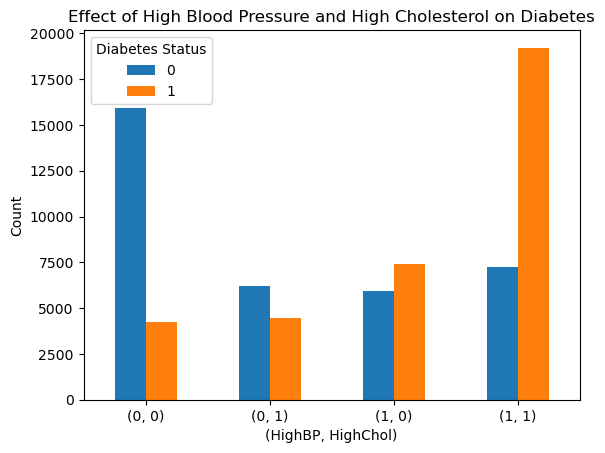

In [15]:
# plotting diabetes_positive based on high blood pressure and high cholestrol
effect_of_bp_chol = df.groupby(['HighBP', 'HighChol'])['Diabetes_binary'].value_counts().unstack(fill_value=0)
effect_of_bp_chol.plot(kind='bar', stacked=False)
plt.title('Effect of High Blood Pressure and High Cholesterol on Diabetes')
plt.xlabel('(HighBP, HighChol)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.show()

#### Interpretation:
The bar plot illustrates the impact of high blood pressure (HighBP) and high cholesterol (HighChol) on the likelihood of diabetes. Observations indicate that:

- Individuals with neither high blood pressure nor high cholesterol have significantly fewer positive diabetes cases.
- Those with high cholesterol but no high blood pressure show a slightly higher proportion of negative diabetes cases compared to positive cases.
- Conversely, individuals with high blood pressure but no high cholesterol exhibit slightly more positive diabetes cases than negative ones.
- Notably, individuals with both high blood pressure and high cholesterol demonstrate a higher proportion of positive diabetes cases

Overall, the plot suggests that the presence of both high blood pressure and high cholesterol may significantly increase the likelihood of diabetes.

In [16]:
# calculating the correlation matrix
correlation_matrix = df.corr()

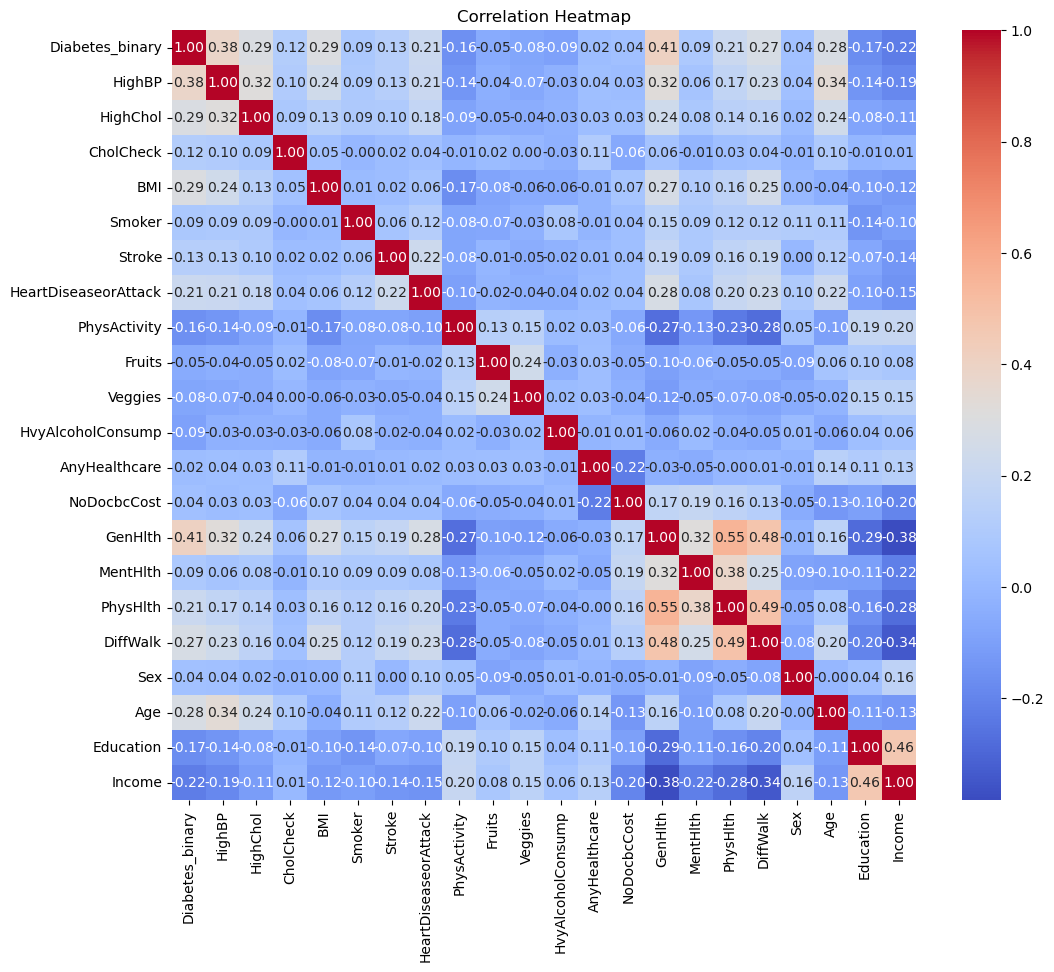

In [17]:
# plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Interpretation:

In the correlation heatmap values range from -1 to 1, where:
- Values close to 1 indicate a strong positive correlation, meaning that as one variable increases, the other also tends to increase.
- Values close to -1 indicate a strong negative correlation, meaning that as one variable increases, the other tends to decrease.
- Values close to 0 indicate little to no correlation between the variables.

Features with darker shades represent stronger correlations.

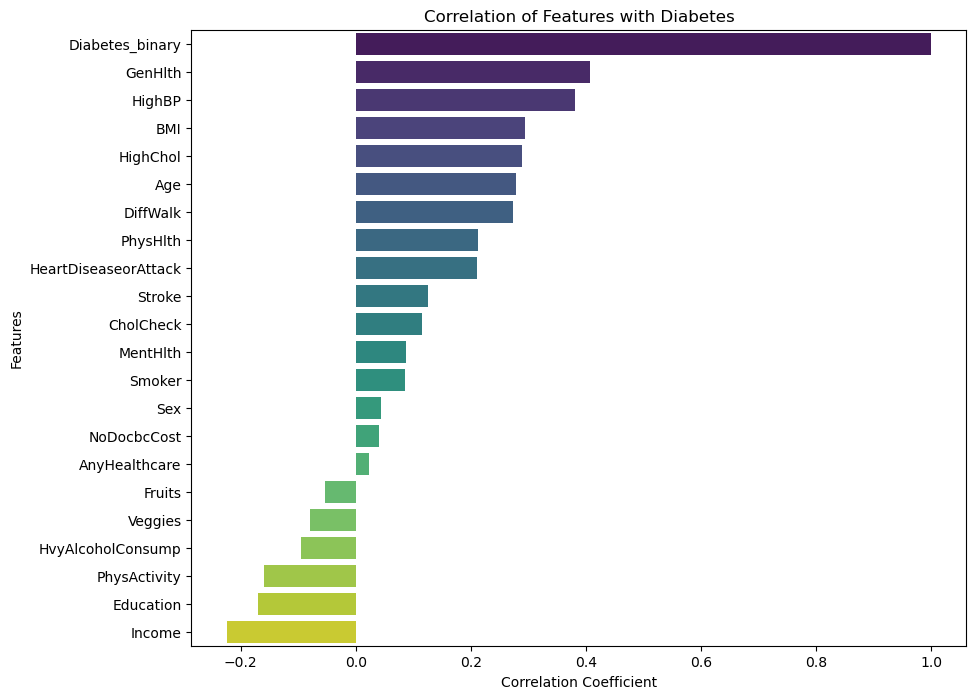

In [18]:
# calculating the correlation coefficients between each feature and the target variable
correlation_with_target = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)

# plotting the correlation coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title('Correlation of Features with Diabetes')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

#### Interpretation:
The correlation bar plot visualizes the strength and direction of the relationship between each feature and the target variable (Diabetes_binary), with positive coefficients indicating a higher likelihood of diabetes and features closer to |1| having stronger associations with the target.

It is observed from the graph that,
- General health, high blood pressure, BMI, high cholesterol, and age exhibit higher positive correlations with diabetes, suggesting that these factors are more strongly associated with the likelihood of diabetes.
- Conversely, education and income have the lowest correlations with diabetes, indicating weaker associations with the target variable.

### Model Selection

In [19]:
# considering X to contain all the features and y as the target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Classification Report:")
print(classification_report(y_test, logistic_predictions))

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("\nRandom Forest Accuracy:", random_forest_accuracy)
print("Classification Report:")
print(classification_report(y_test, random_forest_predictions))

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSupport Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

C:\Users\adavi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7409293443666455
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      7090
           1       0.73      0.77      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139


Random Forest Accuracy: 0.7368979418629323
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      7090
           1       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139


Support Vector Machine (SVM) Accuracy: 0.7489921493740718
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      7090
           1    

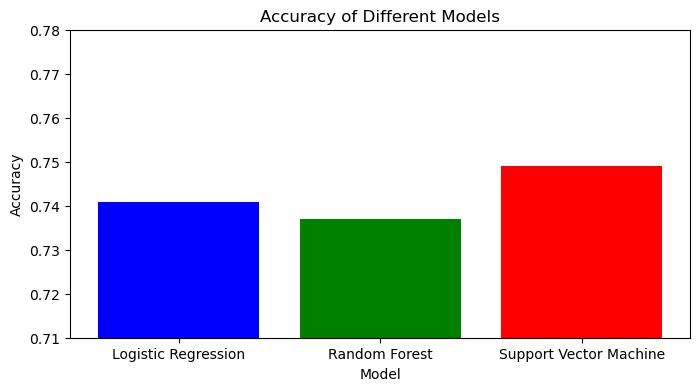

In [20]:
accuracy_scores = [logistic_accuracy, random_forest_accuracy, svm_accuracy]
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']

# Plotting accuracy of each algorithm
plt.figure(figsize=(8, 4))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.71, 0.78)
plt.show()

#### Interpretation:
Multiple machine learning models, including Logistic Regression, Random Forest, and Support Vector Machine (SVM), were trained and evaluated to predict the likelihood of diabetes based on the provided features. After comparing their performance, it was found that the SVM model achieved the highest accuracy among the three, indicating its effectiveness in predicting diabetes. The classification reports provided further insights into the precision, recall, and F1-score of each model, facilitating a comprehensive evaluation of their performance.